In [1]:
#import torch
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
#from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats

In [2]:
mlo_raw = pd.read_excel('../data/phasepdbv2_1_mlolt_mloht.xlsx')
mlo = mlo_raw[(mlo_raw['organism']=='Homo sapiens')&(mlo_raw['entry']!='_')].reset_index(drop=True)
mlo['entry'] = mlo['entry'].apply(lambda x: x.split('-')[0])
mloset = mlo.groupby('MLO')['entry'].apply(lambda x: ' '.join(set(x))).to_frame().reset_index()

mloset['size'] = mloset['entry'].apply(lambda x: len(set(x.split(' '))))
mloset.sort_values(by='size', ascending=False).reset_index(drop=True)

,MLO,entry,size
0,Nucleolus,Q9GZR2 P42330 Q9BRC9 Q6ZMT4 O14523 Q9BUT3 Q995...,2015
1,Stress granule,P57740 Q14847 P42681 O75569 Q8IVM0 Q9Y263 Q6P2...,1536
2,Nuclear stress body,B7Z4Z7 B4DDU5 Q92922 Q4G0S7 P06493 Q16777 Q3KQ...,459
3,P-body,P57078 Q9H6S0 O43423 Q12906 Q8NHL6 Q92945 Q128...,397
4,Nuclear speckle,Q14444 Q92569 O75400 O95382 P98161 P54821 O146...,299
5,Paraspeckle,Q14444 A0A075B6S2 P52815 P62888 Q15233 P47756 ...,252
6,Splicesome,O75525 O75400 Q07666 Q9Y333 P31943 O43660 Q96F...,246
7,Nuclear body,Q15233 Q07864 P09058 Q12906 Q14259 P19388 Q9BZ...,174
8,PML nuclear body,O94762 P27694 Q8IZ83 P54132 Q9UNW1 Q9Y2K1 O004...,165
9,Cajal body,Q92569 Q9UEE5 P49761 Q9Y2F5 P42684 Q9BPY3 Q128...,120


In [3]:
mlo_names  = mloset[mloset['size']>=10]['MLO'].tolist()

In [ ]:
weighted_enrich_df = pd.read_pickle(f'/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl')
unweighted_enrich_df = pd.read_pickle(f'/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/Unweighted_PS_clusters_with_MLO_enrichment.pkl')

In [6]:
len(weighted_enrich_df)

493

In [7]:
len(unweighted_enrich_df)

283

In [ ]:
SAVE_ROOT = '/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/'
preds = pd.read_pickle(f'{SAVE_ROOT}preds.pkl')
genes = pd.read_pickle(f'{SAVE_ROOT}genes.pkl')

In [31]:
genename_to_uniprot = pd.read_pickle("../data/HUMAN_9606_idmapping_genename.pkl")
genename_to_uniprot_integrate = genename_to_uniprot.set_index(['Uniprot']).loc[list(set(genes)&set(genename_to_uniprot['Uniprot'].tolist())),:].reset_index()

genename_to_uniprot_dict = genename_to_uniprot_integrate.set_index(['ID']).to_dict()['Uniprot']
uniprot_to_genename_dict = genename_to_uniprot_integrate.set_index(['Uniprot']).to_dict()['ID']

## weighted & unweighted, PS clusters fraction

In [8]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500
mpl.rcParams['font.family']= 'Arial'

In [9]:
ncluster_weighted = 2093
ncluster_unweighted = 3482

In [10]:
283/3482

0.08127512923607122

In [11]:
493/2093

0.23554706163401815

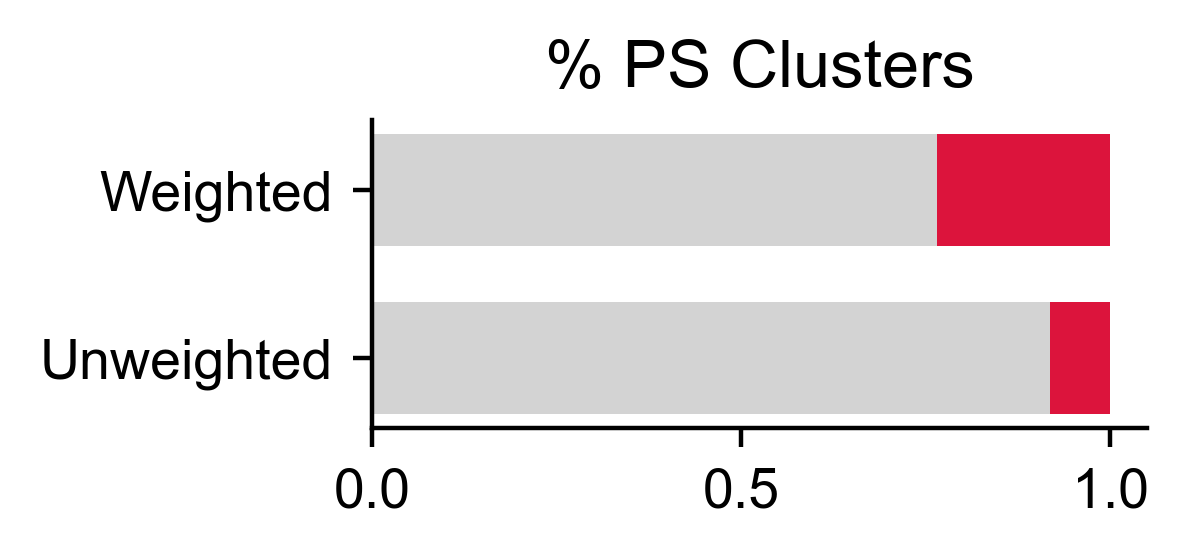

In [ ]:
x = ['Unweighted','Weighted']
y1 = [1-283/3482,1-493/2093]
y2 = [283/3482,493/2093]

plt.figure(figsize=(2.5, 1),dpi = 400)

plt.barh(x, y1, height=0.67,color='lightgrey')
plt.barh(x, y2, left=np.array(y1), height=0.67,color='crimson')


plt.title("% PS Clusters")

sns.despine()

## MLO enrichment comparision

In [174]:
plot_columns = [f"FDR {i}" for i in mlo_names]

In [175]:
weighted_plot_mlo_df = weighted_enrich_df.set_index(['Label']).loc[:,plot_columns]
unweighted_plot_mlo_df = unweighted_enrich_df.set_index(['Label']).loc[:,plot_columns]

In [176]:
weighted_enrich_c = []
for c in weighted_plot_mlo_df.index:
    if np.min(weighted_plot_mlo_df.loc[c,:].tolist()) < 0.05:
        weighted_enrich_c.append(c)

In [177]:
len(weighted_enrich_c)

112

In [178]:
weighted_plot_mlo_df = weighted_plot_mlo_df.loc[weighted_enrich_c,:]
weighted_plot_mlo_df = weighted_plot_mlo_df.drop(weighted_plot_mlo_df.columns[weighted_plot_mlo_df.apply(lambda x: all(x >0.05))],axis=1)

In [179]:
unweighted_enrich_c = []
for c in unweighted_plot_mlo_df.index:
    if np.min(unweighted_plot_mlo_df.loc[c,:].tolist()) < 0.05:
        unweighted_enrich_c.append(c)

In [180]:
len(unweighted_enrich_c)

32

In [181]:
unweighted_plot_mlo_df = unweighted_plot_mlo_df.loc[unweighted_enrich_c,:]
unweighted_plot_mlo_df = unweighted_plot_mlo_df.drop(unweighted_plot_mlo_df.columns[unweighted_plot_mlo_df.apply(lambda x: all(x >0.05))],axis=1)

In [182]:
weighted_plot_mlo_df.columns = [i.replace('FDR ','') for i in weighted_plot_mlo_df.columns]
weighted_plot_mlo_df = -np.log10(weighted_plot_mlo_df)

In [183]:
unweighted_plot_mlo_df.columns = [i.replace('FDR ','') for i in unweighted_plot_mlo_df.columns]
unweighted_plot_mlo_df = -np.log10(unweighted_plot_mlo_df)

In [149]:
mlo_enrich_count1 = {}
for mlo in weighted_plot_mlo_df.columns:
    mlo_enrich_count1[mlo] = len(weighted_plot_mlo_df[weighted_plot_mlo_df[mlo]>-np.log10(0.05)])
mlo_enrich_count1 = pd.DataFrame([mlo_enrich_count1]).T.reset_index()
mlo_enrich_count1.columns = ['MLO','Num']

In [150]:
mlo_enrich_count1

,MLO,Num
0,Cajal body,10
1,IMP1 ribonucleoprotein granule,3
2,Nuclear body,16
3,Nuclear pore complex,1
4,Nuclear speckle,29
5,Nuclear stress body,11
6,Nucleolus,19
7,P-body,15
8,Paraspeckle,37
9,SMN complex,18


In [151]:
mlo_enrich_count2 = {}
for mlo in unweighted_plot_mlo_df.columns:
    mlo_enrich_count2[mlo] = len(unweighted_plot_mlo_df[unweighted_plot_mlo_df[mlo]>-np.log10(0.05)])
mlo_enrich_count2 = pd.DataFrame([mlo_enrich_count2]).T.reset_index()
mlo_enrich_count2.columns = ['MLO','Num']

In [152]:
mlo_enrich_count2

,MLO,Num
0,Cajal body,4
1,IMP1 ribonucleoprotein granule,1
2,Nuclear body,6
3,Nuclear pore complex,1
4,Nuclear speckle,12
5,Nuclear stress body,2
6,Nucleolus,10
7,P-body,3
8,PML nuclear body,0
9,Paraspeckle,7


In [158]:
mlo_enrich_count_df = pd.merge(mlo_enrich_count1,mlo_enrich_count2,how='outer',on = 'MLO').fillna(0)
mlo_enrich_count_df.columns=['MLO','Weighted','Unweighted']

In [162]:
mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)

,MLO,Weighted,Unweighted
12,Stress granule,68.0,23
8,Paraspeckle,37.0,7
11,Splicesome,32.0,12
4,Nuclear speckle,29.0,12
6,Nucleolus,19.0,10
9,SMN complex,18.0,8
2,Nuclear body,16.0,6
7,P-body,15.0,3
5,Nuclear stress body,11.0,2
0,Cajal body,10.0,4


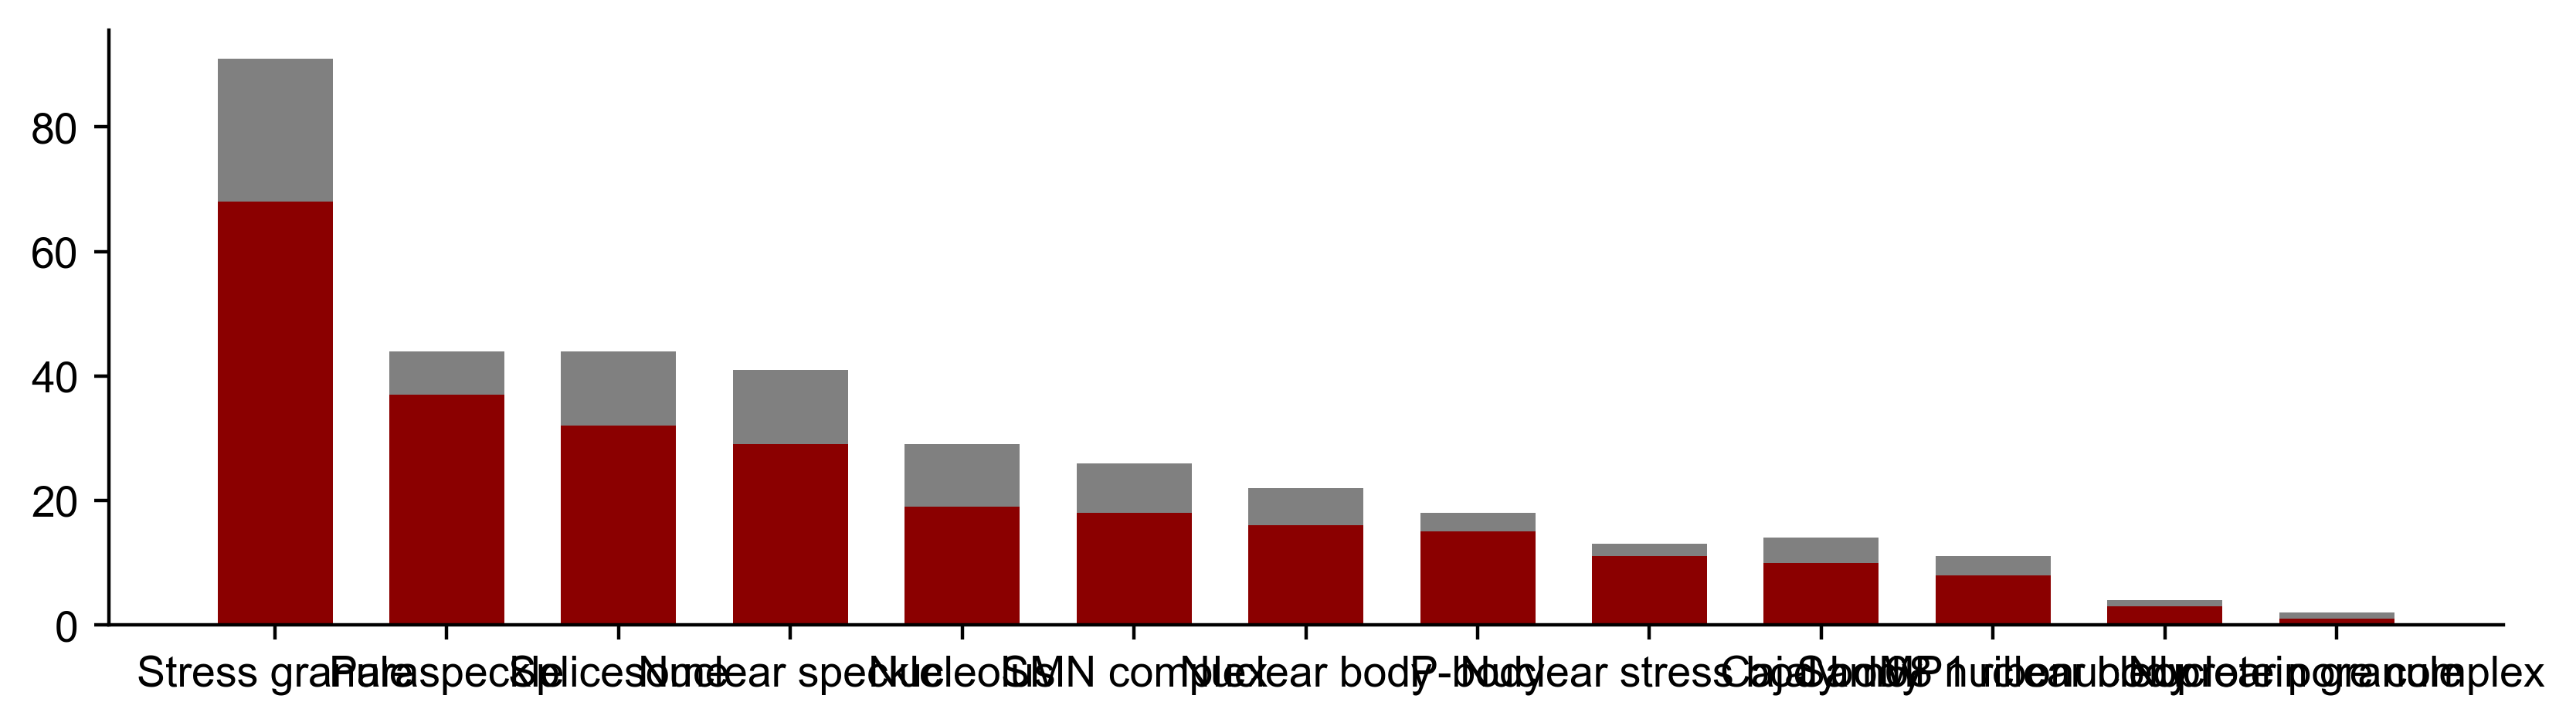

In [ ]:
x = mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['MLO'].tolist()[:-2]
y1 = [1-283/3482,1-493/2093]
y2 = [283/3482-32/3482,493/2093-112/2093]
y3 = [32/3482,112/2093]

plt.figure(figsize=(10, 2.5),dpi = 400)

plt.bar(x, mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['Weighted'].tolist()[:-2], width=0.67,color='darkred')
plt.bar(x, mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['Unweighted'].tolist()[:-2], bottom=mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['Weighted'].tolist()[:-2], width=0.67,color='grey')

sns.despine()

In [131]:
from scipy import stats

In [160]:
stats.spearmanr(mlo_enrich_count_df['Weighted'].tolist(),mlo_enrich_count_df['Unweighted'].tolist())

SignificanceResult(statistic=0.9399137160364188, pvalue=1.960703563836531e-07)

In [187]:
color_dict = dict(zip(list(weighted_plot_mlo_df.index)+list(unweighted_plot_mlo_df.index),['firebrick']*112+['grey']*32))

In [186]:
pd.concat([weighted_plot_mlo_df,unweighted_plot_mlo_df])

,Cajal body,IMP1 ribonucleoprotein granule,Nuclear body,Nuclear pore complex,Nuclear speckle,Nuclear stress body,Nucleolus,P-body,Paraspeckle,SMN complex,Sam68 nuclear body,Splicesome,Stress granule
Label,,,,,,,,,,,,,
SSRP1(31),-0.000000,-0.0000,-0.000000,-0.0,-0.000000,3.758164,0.341983,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.628460
ACBD3(82),-0.000000,-0.0000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,3.910354
SP100(4),-0.000000,-0.0000,1.624070,-0.0,-0.000000,-0.000000,0.005888,0.178053,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
MLLT1(18),1.776342,-0.0000,-0.000000,-0.0,1.225695,-0.000000,0.005888,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.066036
HP1BP3(250),-0.000000,8.2506,7.259976,-0.0,0.319464,0.560857,96.135702,13.698635,1.117469,1.904699,0.342681,2.094168,10.878525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRIP4(8),-0.000000,-0.0000,-0.000000,-0.0,2.039528,-0.000000,0.015613,-0.000000,0.139407,-0.000000,-0.000000,-0.000000,1.419447
RBMX(13),-0.000000,-0.0000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.402224,-0.000000,2.409944,0.597453,0.223790
TRA2B_1(12),0.039145,-0.0000,0.651102,-0.0,1.548240,-0.000000,0.343743,0.084317,0.432551,-0.000000,0.275174,3.178554,1.487208


In [213]:
m = [1,2,3].reverse()
m

d:\conda\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


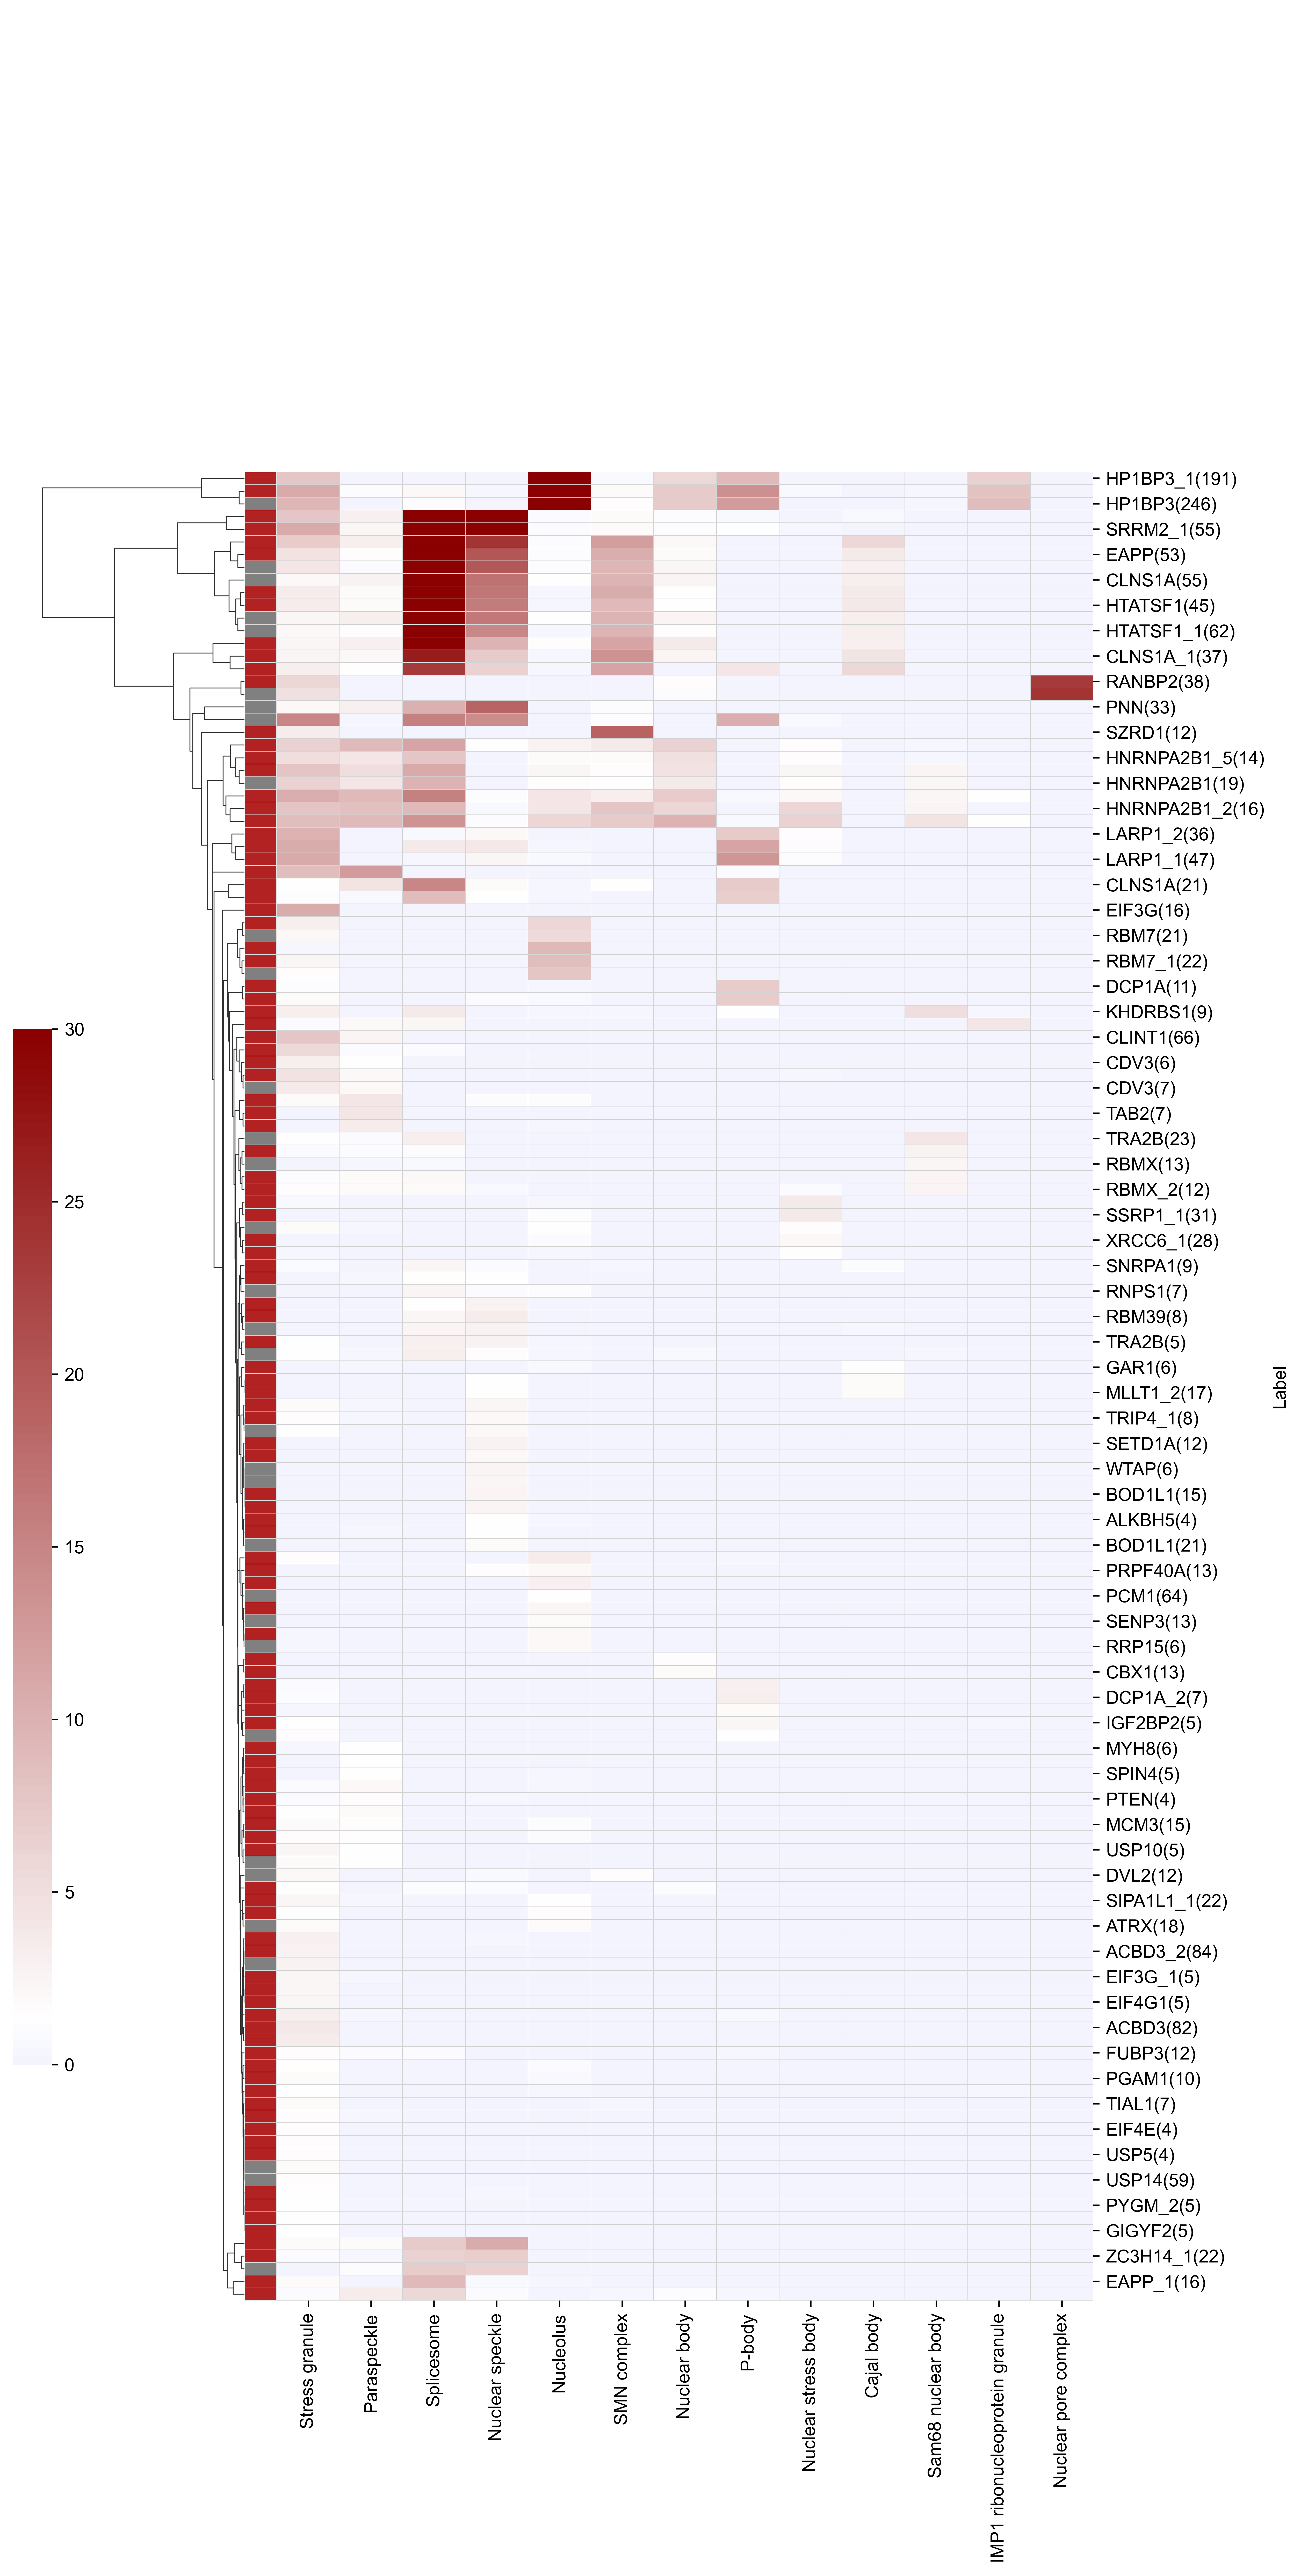

In [ ]:
my_colormap1 = LinearSegmentedColormap.from_list("", ["blue","white","darkred"])

ax = sns.clustermap(pd.concat([weighted_plot_mlo_df,unweighted_plot_mlo_df]).loc[:,mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['MLO'].tolist()[:-2]], cmap = my_colormap1, annot = False, figsize=(10,20),col_cluster=False,
            vmin=0,vmax = 30, center=-np.log10(0.05),square = True, linewidth=0.01,linecolor='lightgrey',cbar_pos=(0, .2, .03, .4),row_colors=pd.concat([weighted_plot_mlo_df,unweighted_plot_mlo_df]).index.map(color_dict)
           )